In [1]:
# Dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp

import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.precision", 2)

# Creating model object and indicating path
data_path = "../../input/Paper_1/processed/"
geo_model = gp.create_model("Paper_1-V1")

No module named 'osgeo'


## Step by step

In [2]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[0, 2000, 0, 20500, -10000, 1000],
    resolution=[50, 100, 100],
    path_i=data_path + "synthetic_surfaces_6.csv",
    #path_o=data_path + "orientations_points.csv",
)

Active grids: ['regular']


Paper_1-V1  2024-04-09 15:49

In [3]:
gp.get_data(
    geo_model,
    "surfaces",
)

,surface,series,order_surfaces,color,id
0,water,Default series,1,#015482,1
1,calcarenito12,Default series,2,#9f0052,2
2,folhelho5,Default series,3,#ffbe00,3
3,calcfol,Default series,4,#728f02,4
4,conglomerados,Default series,5,#443988,5
5,basement,Basement,1,#ff3f20,6


In [4]:
# Ligando a camada a uma série (ponto de orientação somente para uma formação) do topo para base.
gp.map_stack_to_surfaces(
    geo_model,
    {
        "SF": ("water"),
        "Strat_2": ("calcarenito12"),
        "Strat_3": ("folhelho5"),
        "Strat_4": ("calcfol"),
        "Strat_5": ("conglomerados"),
        "Basement_series": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,water,SF,1,#015482,1
1,calcarenito12,Strat_2,1,#9f0052,2
2,folhelho5,Strat_3,1,#ffbe00,3
3,calcfol,Strat_4,1,#728f02,4
4,conglomerados,Strat_5,1,#443988,5
5,basement,Basement_series,1,#ff3f20,6


In [5]:
geo_model.series

,order_series,BottomRelation,isActive,isFault,isFinite
SF,1,Erosion,False,False,False
Strat_2,2,Erosion,False,False,False
Strat_3,3,Erosion,False,False,False
Strat_4,4,Erosion,False,False,False
Strat_5,5,Erosion,False,False,False
Basement_series,6,Erosion,False,False,False


In [6]:
geo_model.get_data()

X         Y        Z    smooth        surface  G_x   
surface_points 0     1000.0     23.40   -36.11  2.00e-06          water  NaN  \
               1     1000.0    274.97   -62.71  2.00e-06          water  NaN   
               2     1000.0    545.56  -212.83  2.00e-06          water  NaN   
               3     1000.0    778.11  -389.56  2.00e-06          water  NaN   
               4     1000.0   1069.17  -389.56  2.00e-06          water  NaN   
...                     ...       ...      ...       ...            ...  ...   
               1375  2000.0  18374.82 -4788.70  2.00e-06  conglomerados  NaN   
               1376  2000.0  19403.04 -4879.91  2.00e-06  conglomerados  NaN   
               1377  2000.0  20021.73 -4623.38  2.00e-06  conglomerados  NaN   
               1378  2000.0  20331.80 -4404.84  2.00e-06  conglomerados  NaN   
               1379  2000.0  20444.42 -4057.09  2.00e-06  conglomerados  NaN   

                     G_y  G_z  
surface_points 0     NaN  NaN  
               1     NaN  NaN  
               2     NaN  NaN  
               3     NaN  NaN  
               4     NaN  NaN  
...                  ...  ...  
               1375  NaN  NaN  
               1376  NaN  NaN  
               1377  NaN  NaN  
               1378  NaN  NaN  
               1379  NaN  NaN  

[1380 rows x 8 columns]

In [7]:
neighbours = gp.select_nearest_surfaces_points(geo_model, geo_model.surface_points.df, 10)
opoints = gp.set_orientation_from_neighbours_all(geo_model, neighbours)

In [8]:
geo_model.get_data()

X         Y        Z    smooth        surface   G_x   
surface_points 0    1000.0     23.40   -36.11  2.00e-06          water   NaN  \
               1    1000.0    274.97   -62.71  2.00e-06          water   NaN   
               2    1000.0    545.56  -212.83  2.00e-06          water   NaN   
               3    1000.0    778.11  -389.56  2.00e-06          water   NaN   
               4    1000.0   1069.17  -389.56  2.00e-06          water   NaN   
...                    ...       ...      ...       ...            ...   ...   
orientations   915  2000.0  18374.82 -4788.70  1.00e-02  conglomerados -0.03   
               916  2000.0  19403.04 -4879.91  1.00e-02  conglomerados -0.18   
               917  2000.0  20021.73 -4623.38  1.00e-02  conglomerados -0.05   
               918  2000.0  20331.80 -4404.84  1.00e-02  conglomerados -0.02   
               919  2000.0  20444.42 -4057.09  1.00e-02  conglomerados -0.02   

                     G_y   G_z  
surface_points 0     NaN   NaN  
               1     NaN   NaN  
               2     NaN   NaN  
               3     NaN   NaN  
               4     NaN   NaN  
...                  ...   ...  
orientations   915  0.24  0.97  
               916 -0.24  0.95  
               917 -0.54  0.84  
               918 -0.59  0.81  
               919 -0.59  0.81  

[2760 rows x 8 columns]

In [9]:
# Salvando os pontos de orientação gerados pelo KNN (K=10)
orientations_p = geo_model.orientations.df
#orientations_p.to_csv(data_path + "orientations_points.csv")
orientations_p

,X,Y,Z,X_c,Y_c,Z_c,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
1005,1000.0,23.40,-36.11,0.50,0.25,0.59,-1.30e-02,0.41,0.91,24.42,3.58e+02,1.0,water,SF,1.0,1.0,0.01
1006,1000.0,274.97,-62.71,0.50,0.26,0.59,-1.30e-02,0.41,0.91,24.42,3.58e+02,1.0,water,SF,1.0,1.0,0.01
1007,1000.0,545.56,-212.83,0.50,0.26,0.59,5.60e-18,0.42,0.91,24.91,7.61e-16,1.0,water,SF,1.0,1.0,0.01
1008,1000.0,778.11,-389.56,0.50,0.27,0.58,-3.77e-18,0.38,0.92,22.51,3.60e+02,1.0,water,SF,1.0,1.0,0.01
1009,1000.0,1069.17,-389.56,0.50,0.28,0.58,1.68e-18,0.39,0.92,22.76,2.49e-16,1.0,water,SF,1.0,1.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,2000.0,18374.82,-4788.70,0.52,0.70,0.48,-2.70e-02,0.24,0.97,14.15,3.54e+02,1.0,conglomerados,Strat_5,5.0,5.0,0.01
916,2000.0,19403.04,-4879.91,0.52,0.72,0.47,-1.84e-01,-0.24,0.95,17.41,2.18e+02,1.0,conglomerados,Strat_5,5.0,5.0,0.01
917,2000.0,20021.73,-4623.38,0.52,0.74,0.48,-4.79e-02,-0.54,0.84,32.85,1.85e+02,1.0,conglomerados,Strat_5,5.0,5.0,0.01
918,2000.0,20331.80,-4404.84,0.52,0.75,0.49,-2.01e-02,-0.59,0.81,35.83,1.82e+02,1.0,conglomerados,Strat_5,5.0,5.0,0.01


In [10]:
# Trocando o nome de surface para formation (necessário se for importar no Gempy)
orientations_p_formation = orientations_p.copy()
orientations_p_formation = orientations_p_formation.rename(columns={'surface': 'formation'})
orientations_p_formation.to_csv(data_path + "orientations_points.csv")
orientations_p_formation

,X,Y,Z,X_c,Y_c,Z_c,G_x,G_y,G_z,dip,azimuth,polarity,formation,series,id,order_series,smooth
1005,1000.0,23.40,-36.11,0.50,0.25,0.59,-1.30e-02,0.41,0.91,24.42,3.58e+02,1.0,water,SF,1.0,1.0,0.01
1006,1000.0,274.97,-62.71,0.50,0.26,0.59,-1.30e-02,0.41,0.91,24.42,3.58e+02,1.0,water,SF,1.0,1.0,0.01
1007,1000.0,545.56,-212.83,0.50,0.26,0.59,5.60e-18,0.42,0.91,24.91,7.61e-16,1.0,water,SF,1.0,1.0,0.01
1008,1000.0,778.11,-389.56,0.50,0.27,0.58,-3.77e-18,0.38,0.92,22.51,3.60e+02,1.0,water,SF,1.0,1.0,0.01
1009,1000.0,1069.17,-389.56,0.50,0.28,0.58,1.68e-18,0.39,0.92,22.76,2.49e-16,1.0,water,SF,1.0,1.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,2000.0,18374.82,-4788.70,0.52,0.70,0.48,-2.70e-02,0.24,0.97,14.15,3.54e+02,1.0,conglomerados,Strat_5,5.0,5.0,0.01
916,2000.0,19403.04,-4879.91,0.52,0.72,0.47,-1.84e-01,-0.24,0.95,17.41,2.18e+02,1.0,conglomerados,Strat_5,5.0,5.0,0.01
917,2000.0,20021.73,-4623.38,0.52,0.74,0.48,-4.79e-02,-0.54,0.84,32.85,1.85e+02,1.0,conglomerados,Strat_5,5.0,5.0,0.01
918,2000.0,20331.80,-4404.84,0.52,0.75,0.49,-2.01e-02,-0.59,0.81,35.83,1.82e+02,1.0,conglomerados,Strat_5,5.0,5.0,0.01


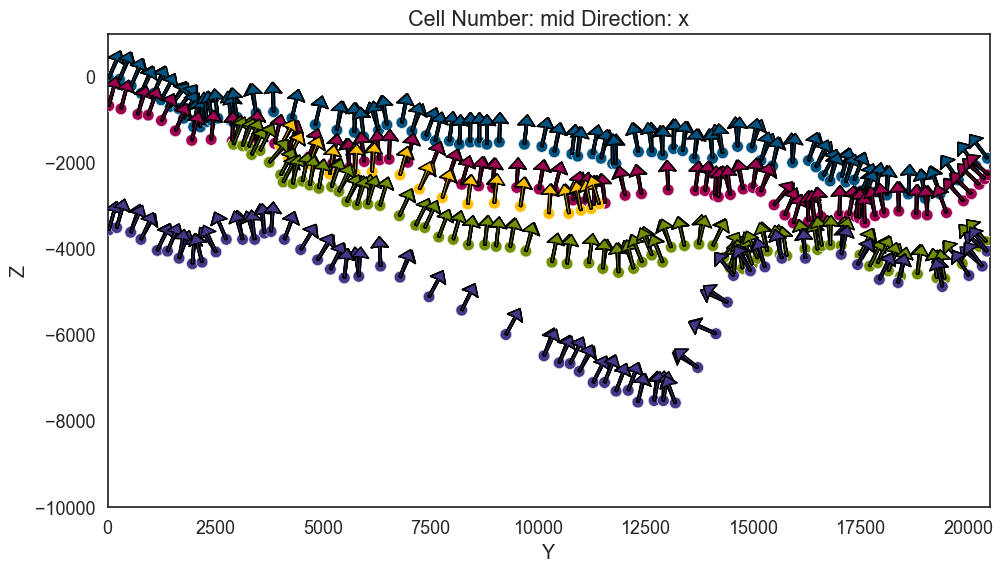

In [11]:
# Seção transversal do modelo
#gp.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=5, legend=False)
gp.plot_2d(geo_model, direction="x", show_data=True, show_lith=True, ve=1, legend=False)
#gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

In [12]:
# Ver os dados em 3D
#gpv = gp.plot_3d(
#    geo_model,
#    plotter_type="background",
#    image=False,
#    show_data=True,
#    show_surfaces=True,
#    show_scalar=True,
#    show_boundaries=True,
#    ve=1,
#)

In [13]:
%%time
gp.set_interpolator(
    geo_model, 
    output=['geology'], 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
    verbose=[]
)

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                              values
range                      23350.59
$C_o$                   12982142.86
drift equations  [3, 3, 3, 3, 3, 3]
CPU times: total: 19 s
Wall time: 19.8 s


In [14]:
geo_model.update_to_interpolator()

True

In [15]:
%%time
gp.compute_model(
    geo_model, 
    compute_mesh=True,
    )

CPU times: total: 28min 29s
Wall time: 5min 26s



Lithology ids 
  [6. 6. 6. ... 1. 1. 1.] 

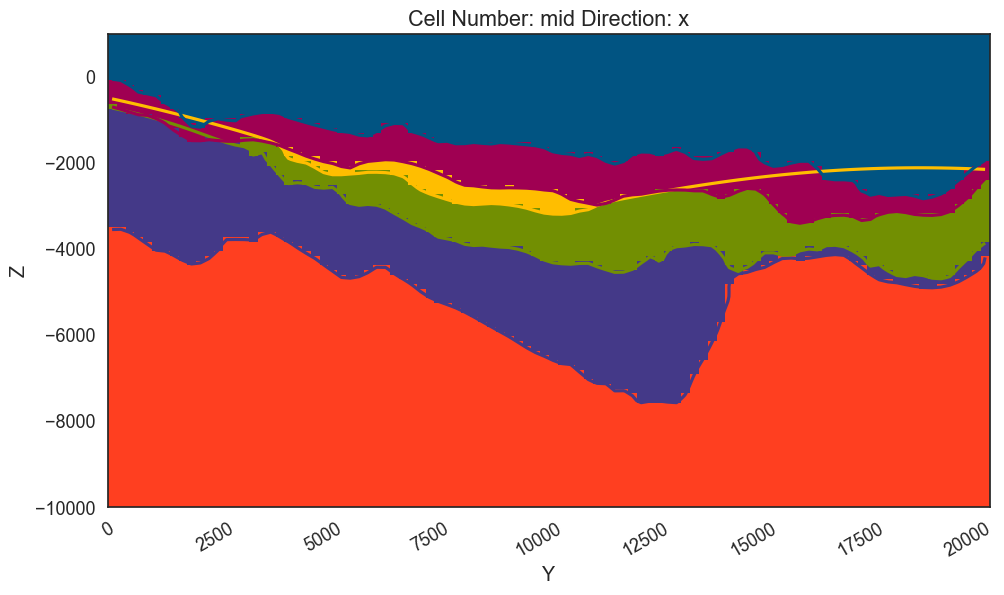

In [16]:
# Seção transversal do modelo

gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=1,
    legend=True,
)

In [23]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type="background", show_data=False, ve=1)

In [29]:
topo_init = tp.compute_topology(
    geo_model, direction="x", voxel_threshold=1
)  # , direction="Y", cell_number=15)
edges_init, centroids_init = tp.clean_unconformity_topology(
    geo_model, 1, topo_init[0], topo_init[1]
)

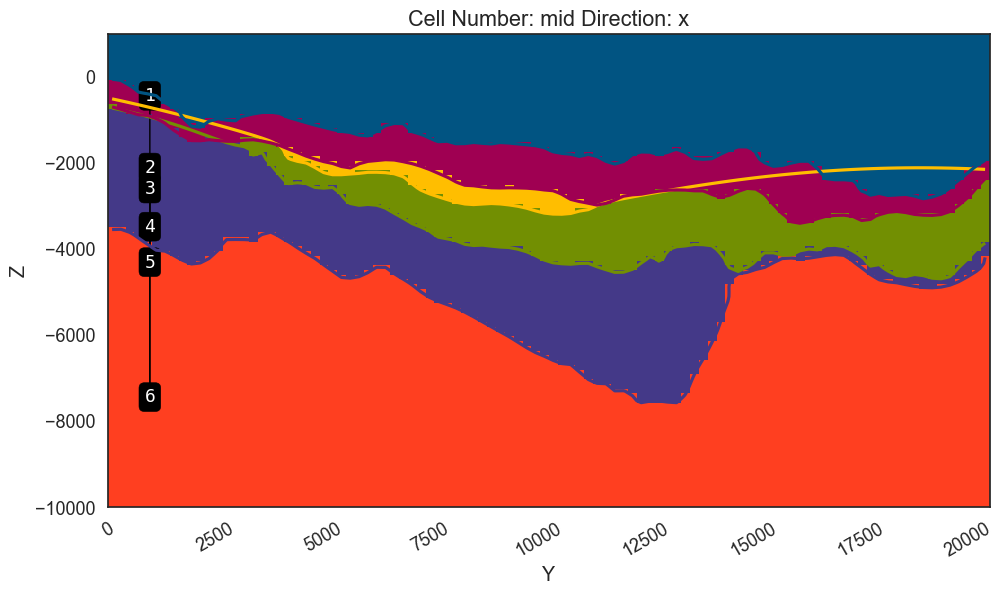

In [30]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot.plot_topology(geo_model, edges_init, centroids_init)

In [20]:
# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
#gp.save_model(
#    geo_model,
#    compress=True,
#)

In [21]:
#import pickle
#import datetime
#model_name = "StratBR_BES_v6"
#resolution = [50, 50, 50]
#date_t = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
#fn = f"{model_name}_{resolution[0]}x_{resolution[1]}y_{resolution[2]}z_{date_t}.pkl"
#save_path = "../../../../output/BES/StartBR/V6/"
#with open(save_path + fn, "wb") as f:
#    pickle.dump(geo_model, f)